In [ ]:
import pandas as pd
df = pd.read_excel('text_analysis_ad_sample.xlsx', index_col=0)
df

In [ ]:
import jieba
# Define a function to perform Chinese word segmentation on input text
def clean_text(text):
    # Use jieba.lcut to segment the input text into words, returning a list of words
    words=jieba.lcut(text)
    # Join the segmented words with a space and return the resulting string
    return ' '.join(words)

# Apply the clean_text function to each element in the '广告文本' column of the DataFrame
# and store the segmented results in a new column named '广告文本分词'
df['广告文本分词']=df['广告文本'].apply(clean_text)

In [ ]:
df['广告文本分词']

In [ ]:
from gensim.test.utils import common_texts
common_texts

In [39]:
sentences=df['广告文本分词'].apply(lambda x: x.split()).tolist()
sentences

[['兰勃',
  '脱白',
  '脱勒',
  '公司',
  '五华',
  '牌',
  '香烟',
  '佛及',
  '尼埃',
  '香烟',
  '二十',
  '枝装',
  '每包',
  '售',
  '国币',
  '大洋',
  '二角',
  '五十',
  '枝装',
  '每罐',
  '售',
  '国币',
  '大洋',
  '五角'],
 ['讲求',
  '卫生',
  '为',
  '人生',
  '本性',
  '天理',
  '固然',
  '也',
  '人生',
  '首贵',
  '逐日',
  '大便',
  '通畅',
  '有序',
  '为',
  '天然',
  '所当',
  '如此',
  '也',
  '如若',
  '大便',
  '不利',
  '大',
  '肠阻塞',
  '则',
  '胃失',
  '消化',
  '疾病',
  '头痛',
  '肝火',
  '上升',
  '胆汁',
  '不',
  '调',
  '口气',
  '积浊',
  '舌现',
  '黄苔',
  '诸恙',
  '接踵',
  '而',
  '起',
  '矣',
  '凡',
  '此皆须',
  '服用',
  '韦廉士',
  '大',
  '医生',
  '红色',
  '清导丸',
  '以利',
  '大便',
  '俾得',
  '体质',
  '强健',
  '百病',
  '不侵',
  '也况',
  '此丸',
  '之',
  '功力',
  '天然',
  '平和',
  '不尚',
  '霸烈',
  '广东省',
  '城',
  '医生',
  '学',
  '研究会',
  '*',
  '生',
  '先生',
  '来示',
  '云弟',
  '患大',
  '便秘',
  '结之症',
  '一月',
  '有余',
  '困苦',
  '万状',
  '难以',
  '言喻',
  '服用',
  '韦廉士',
  '红色',
  '清导丸',
  '数粒',
  '大便',
  '畅达',
  '于是',
  '常为',
  '服用',
  '身体',
  '爽健为',
  '半生',
  '以来',
  '所',
  '未有',
  '也',
  '如

In [40]:
from gensim.models import Word2Vec
model=Word2Vec(sentences)

In [42]:
# 从 model 对象的词向量（wv）属性中获取所有单词的列表，
# index_to_key 是一个包含所有单词的列表，按索引顺序排列
word_list=model.wv.index_to_key
# 根据 word_list 中的单词，从 model 对象的词向量属性中获取对应的词向量，
# 最终得到一个包含所有单词对应词向量的数组
word_vectors=model.wv[word_list]
for word,vector in list(zip(word_list,word_vectors))[0:10]:
    print(word,vector)

之 [-0.5765017   0.590956    0.19215278 -0.23892647 -0.3238771  -1.5931802
  0.66071     1.8324665  -0.5713238  -0.5156431  -0.19500506 -1.3840028
 -0.22488399  0.5599748   0.15952355 -0.5415863  -0.18163955 -0.725994
  0.0859877  -1.2789487   0.8302438   0.16662908  0.33574343 -0.23191857
 -0.12307107  0.07531775 -0.15399702 -0.5859666  -0.8907683  -0.15716568
  0.99699223  0.16694184  0.1939305  -0.3234659  -0.31569076  1.2627738
  0.2791726  -0.8444638  -0.54721594 -1.6613525   0.12139871 -0.40770525
 -0.21010675  0.03018134  0.80117816 -0.1408327  -0.8481967   0.09893351
  0.6500855   0.34615198  0.32228366 -0.6969537  -0.4436028  -0.07614505
 -0.01405463  0.4291279   0.3412787  -0.03851502 -0.72139156  0.04703489
  0.11724779  0.51453704 -0.48174125 -0.03530488 -0.5938313   0.7370885
  0.26596648  0.73938364 -0.66547024  1.3632072  -0.7497342   0.38363123
  0.5858584  -0.3020812   0.9469388   0.33411717  0.11491894 -0.08981588
 -0.6373179   0.07960737 -0.2905102   0.20823754 -0.704

In [ ]:
model.wv.most_similar('卫生')

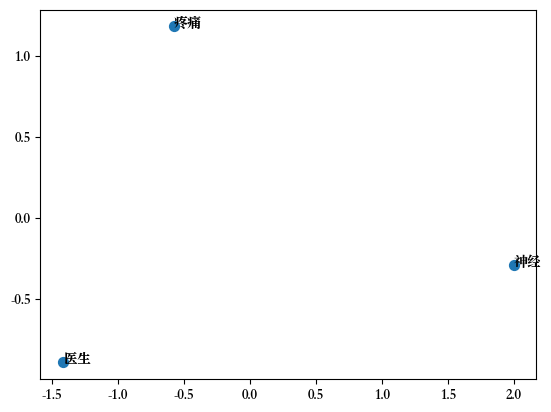

In [52]:
# 选择要可视化的词语
words = ['医生','疼痛', '神经']

# 获取这些词的词向量
vectors = [model.wv[word] for word in words]

# 导入PCA用于降维
from sklearn.decomposition import PCA

# 使用PCA将词向量从100维降到2维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

# 导入matplotlib用于绘图
import matplotlib.pyplot as plt

# 设置中文字体和负号显示
plt.rcParams["font.sans-serif"]=["Songti SC","PingFang SC"]
plt.rcParams["axes.unicode_minus"]=False

# 创建图形窗口
plt.figure()

# 绘制词语二维空间的散点图
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50)

# 标注每个点对应的词语
for i, word in enumerate(words):
    plt.text(pca_result[i, 0], pca_result[i, 1], word)

# 显示图形
plt.show()